In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

(2317, 3)


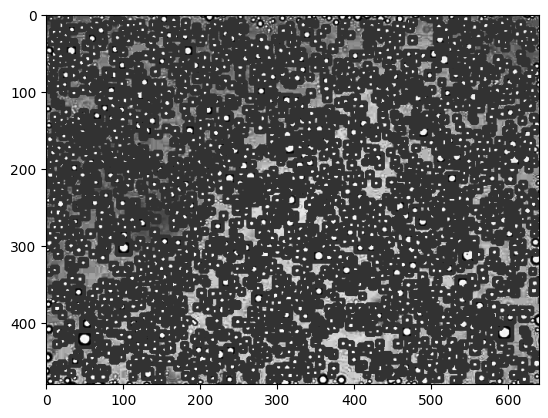

In [2]:
# часть для проверки правильности импорта обучающи данных и отрисовка размеченных вручную сфер на картинке
# загрузка
nameimage = 'image_0082.tif'
nametabl = 'image_0082.txt'
image=cv2.imread(nameimage)
krugikoor=np.loadtxt(nametabl)
#преобразование изображения в ч/б и выравнивание гистограммы распределения цветов
imageg=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imagegh = cv2.equalizeHist(imageg)
print(krugikoor.shape)

# отрисовка границ сфер
for y,x,d in (krugikoor):
    imagegh=cv2.rectangle(imagegh,(int(x-d/2),int(480-y+d/2)),(int(x+d/2),int(480-y-d/2)),(50),3)

# вывод результата    
plt.imshow(imagegh,cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
#подготовка набора обучающих данных для модели на основе предварительно размеченных автором изображений
#ЗАДАЕМ СООТНОШЕНИЕ ДИАМЕТРА ШАРИКА И РАЗМЕРА СКОЛЬЗЯЩЕГО ОКНА sdR 1.6 ИЛИ 4 и вырезаем все нужные изображения в размер ps*ps
sdr=1.4
imn=0
i=0
ps=32
# Массив для хранения изображений воздушных сфер в строчном формате 1024=32*32
imagey=np.zeros((37248,ps**2),dtype='uint8')

# Перечень имеющихся размеченных данных
imgname=({0:'pic0.jpg',1:'pic1.jpg',2:'pic2.jpg',3:'pic3.jpg',4:'pic4.jpg',5:'image_003.tif',6:'image_004.tif',7:'image_005.tif',
    8:'image_006.tif',9:'image_007.tif',10:'image_008.tif',11:'image_011.tif',12:'image_012.tif',13:'image_013.tif',
    14:'image_555.tif',15:'image_015.tif',
    16:'image_016.tif',17:'image_019.tif',18:'image_020.tif',19:'image_021.tif',20:'image_023.tif',21:'image_058.tif',
    22:'image_070.tif',23:'image_079.tif',24:'image_108.tif',25:'image_111.tif',26:'image_222.tif',27:'image_310.tif',
    28:'image_444.tif',29:'image_552.tif',30:'image_0082.tif',31:'gir.tif',32:'image_0032.tif',33:'gir2.tif'})
txtname=({0:'pic0.txt',1:'pic1.txt',2:'pic2.txt',3:'pic3.txt',4:'pic4.txt',5:'image_003.txt',6:'image_004.txt',7:'image_005.txt',
    8:'image_006.txt',9:'image_007.txt',10:'image_008.txt',11:'image_011.txt',12:'image_012.txt',13:'image_013.txt',
    14:'image_555.txt',15:'image_015.txt',
    16:'image_016.txt',17:'image_019.txt',18:'image_020.txt',19:'image_021.txt',20:'image_023.txt',21:'image_058.txt',
    22:'image_070.txt',23:'image_079.txt',24:'image_108.txt',25:'image_111.txt',26:'image_222.txt',27:'image_310.txt',
    28:'image_444.txt',29:'image_552.txt',30:'image_0082.txt',31:'gir.txt',32:'image_0032.txt',33:'gir2.txt'})

#Цикл обработки изображений 
while imn<34*2:
    
    #print(imgname[int(imn)])
    # простая аугментация - каждое изображение обрабатывается дважды с выравниванием гистограммы распределения цветов и без
    image=cv2.imread(str(imgname[int(imn/2)]))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #if int(imn/2)%2==0:
        #gray = cv2.equalizeHist(gray)
    gray2=gray.copy()
    koor_sferi=np.loadtxt(str(txtname[int(imn/2)]))
    print(koor_sferi.shape)

    inter=cv2.INTER_AREA


    for y,x,d in (koor_sferi):
        # пропуск слижком маленьких сфер      
        if d<12:
            d=12
            #print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 3d
        a=int(x-0.5*sdr*d)
        b=int(x+0.5*sdr*d)
        c=int(480-y-0.5*sdr*d)
        d=int(480-y+0.5*sdr*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            #print("continue")
            continue
            
        if a>640:
            a=640
            #print("continue")
            continue
        if b<0:
            b=0
            #print("continue")
            continue
        if b>640:
            b=640 
            #print("continue")
            continue
        if c<0:
            c=0
            #print("continue")
            continue
        if c>480:
            c=480
            #print("continue")
            continue
        if d<0:
            d=0
            #print("continue")
            continue
        if d>480:
            d=480
            #print("continue")
            continue
        if int(sdr*d)>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC    

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagey[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1
        
        imagey[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1



    imn=imn+1
    print(imn)
    print(i)

    #print(imagey.shape)




(309, 3)
1
1048
(309, 3)
2
2096
(229, 3)
3
3080
(229, 3)
4
4064
(253, 3)
5
5520
(253, 3)
6
6976
(421, 3)
7
8104
(421, 3)
8
9232
(474, 3)
9
11136
(474, 3)
10
13040
(56, 3)
11
13248
(56, 3)
12
13456
(39, 3)
13
13704
(39, 3)
14
13952
(79, 3)
15
14200
(79, 3)
16
14448
(76, 3)
17
14664
(76, 3)
18
14880
(295, 3)
19
15200
(295, 3)
20
15520
(374, 3)
21
17480
(374, 3)
22
19440
(150, 3)
23
19688
(150, 3)
24
19936
(124, 3)
25
20104
(124, 3)
26
20272
(110, 3)
27
20440
(110, 3)
28
20608
(32, 3)
29
20760
(32, 3)
30
20912
(134, 3)
31
21200
(134, 3)
32
21488
(36, 3)
33
21688
(36, 3)
34
21888
(34, 3)
35
22072
(34, 3)
36
22256
(108, 3)
37
22600
(108, 3)
38
22944
(132, 3)
39
23272
(132, 3)
40
23600
(246, 3)
41
24024
(246, 3)
42
24448
(238, 3)
43
25096
(238, 3)
44
25744
(98, 3)
45
26008
(98, 3)
46
26272
(321, 3)
47
27784
(321, 3)
48
29296
(53, 3)
49
29592
(53, 3)
50
29888
(24, 3)
51
30016
(24, 3)
52
30144
(29, 3)
53
30248
(29, 3)
54
30352
(48, 3)
55
30632
(48, 3)
56
30912
(28, 3)
57
31072
(28, 3)
58
31232

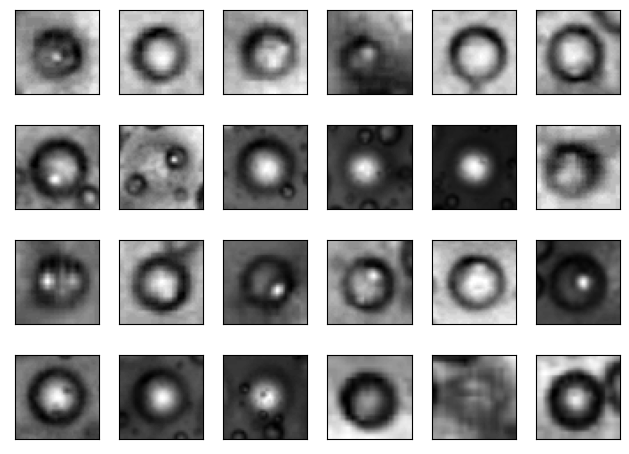

In [4]:
# графическое отражение некоторых из сфер для обучения модели
fig, ax = plt.subplots(nrows=4, ncols=6, sharex= True, sharey = True)
ax=ax.flatten()
for i in range(24):
    img = cv2.resize(imagey[i*100+,:].reshape(ps,ps),dsize=(48,48))
    ax[i].imshow(img,cmap=plt.get_cmap('gray'))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
fig.savefig('fig1.jpg')
plt.show()



In [5]:
#Обработка данных для картинок с "не" воздушными сферами
#в два этапа
# сначала по координатам уже размеченных сфер с двигом или зумом ±20%
#
imagen=np.zeros((6000000,ps**2),dtype='uint8')

imn=0
i=0


#Цикл обработки изображений 
while imn<34*2:
    
    print(imgname[int(imn/2)])
    # простая аугментация - каждое изображение обрабатывается дважды с выравниванием гистограммы распределения цветов и без
    image=cv2.imread(str(imgname[int(imn/2)]))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if int(imn/2)%2==0:
        gray = cv2.equalizeHist(gray)
    gray2=gray.copy()
    koor_sferi=np.loadtxt(str(txtname[int(imn/2)]))
    print(koor_sferi.shape)
    inter=cv2.INTER_AREA


    for y,x,d in (koor_sferi):
        y=y+0.2*d
        # пропуск слижком маленьких сфер
        if d<12:
            d=5
            print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 3d
        a=int(x-0.5*sdr*d)
        b=int(x+0.5*sdr*d)
        c=int(480-y-0.5*sdr*d)
        d=int(480-y+0.5*sdr*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            print("continue")
            continue
            
        if a>640:
            a=640
            print("continue")
            continue
        if b<0:
            b=0
            print("continue")
            continue
        if b>640:
            b=640 
            print("continue")
            continue
        if c<0:
            c=0
            print("continue")
            continue
        if c>480:
            c=480
            print("continue")
            continue
        if d<0:
            d=0
            print("continue")
            continue
        if d>480:
            d=480
            print("continue")
            continue
        if int(sdr*d)>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC    

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagen[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1
        
    for y,x,d in (koor_sferi):
        y=y-0.2*d
        # пропуск слижком маленьких сфер
        if d<12:
            d=5
            print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 3d
        a=int(x-0.5*sdr*d)
        b=int(x+0.5*sdr*d)
        c=int(480-y-0.5*sdr*d)
        d=int(480-y+0.5*sdr*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            print("continue")
            continue
            
        if a>640:
            a=640
            print("continue")
            continue
        if b<0:
            b=0
            print("continue")
            continue
        if b>640:
            b=640 
            print("continue")
            continue
        if c<0:
            c=0
            print("continue")
            continue
        if c>480:
            c=480
            print("continue")
            continue
        if d<0:
            d=0
            print("continue")
            continue
        if d>480:
            d=480
            print("continue")
            continue
        if int(sdr*d)>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC    

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagen[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1  
      
    
    for y,x,d in (koor_sferi):
        x=x+0.2*d
        # пропуск слижком маленьких сфер
        if d<12:
            d=5
            print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 3d
        a=int(x-0.5*sdr*d)
        b=int(x+0.5*sdr*d)
        c=int(480-y-0.5*sdr*d)
        d=int(480-y+0.5*sdr*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            print("continue")
            continue
            
        if a>640:
            a=640
            print("continue")
            continue
        if b<0:
            b=0
            print("continue")
            continue
        if b>640:
            b=640 
            print("continue")
            continue
        if c<0:
            c=0
            print("continue")
            continue
        if c>480:
            c=480
            print("continue")
            continue
        if d<0:
            d=0
            print("continue")
            continue
        if d>480:
            d=480
            print("continue")
            continue
        if int(sdr*d)>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC    

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagen[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1  
        
    for y,x,d in (koor_sferi):
        x=x-0.2*d
        # пропуск слижком маленьких сфер
        if d<12:
            d=5
            print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 3d
        a=int(x-0.5*sdr*d)
        b=int(x+0.5*sdr*d)
        c=int(480-y-0.5*sdr*d)
        d=int(480-y+0.5*sdr*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            print("continue")
            continue
            
        if a>640:
            a=640
            print("continue")
            continue
        if b<0:
            b=0
            print("continue")
            continue
        if b>640:
            b=640 
            print("continue")
            continue
        if c<0:
            c=0
            print("continue")
            continue
        if c>480:
            c=480
            print("continue")
            continue
        if d<0:
            d=0
            print("continue")
            continue
        if d>480:
            d=480
            print("continue")
            continue
        if int(sdr*d)>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC    

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagen[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1    
    for y,x,d in (koor_sferi):
        d=d+0.2*d
        # пропуск слижком маленьких сфер
        if d<12:
            d=5
            print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 3d
        a=int(x-0.5*sdr*d)
        b=int(x+0.5*sdr*d)
        c=int(480-y-0.5*sdr*d)
        d=int(480-y+0.5*sdr*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            print("continue")
            continue
            
        if a>640:
            a=640
            print("continue")
            continue
        if b<0:
            b=0
            print("continue")
            continue
        if b>640:
            b=640 
            print("continue")
            continue
        if c<0:
            c=0
            print("continue")
            continue
        if c>480:
            c=480
            print("continue")
            continue
        if d<0:
            d=0
            print("continue")
            continue
        if d>480:
            d=480
            print("continue")
            continue
        if int(sdr*d)>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC    

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagen[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1   
        
    for y,x,d in (koor_sferi):
        d=d-0.2*d
        # пропуск слижком маленьких сфер
        if d<12:
            d=5
            print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 3d
        a=int(x-0.5*sdr*d)
        b=int(x+0.5*sdr*d)
        c=int(480-y-0.5*sdr*d)
        d=int(480-y+0.5*sdr*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            print("continue")
            continue
            
        if a>640:
            a=640
            print("continue")
            continue
        if b<0:
            b=0
            print("continue")
            continue
        if b>640:
            b=640 
            print("continue")
            continue
        if c<0:
            c=0
            print("continue")
            continue
        if c>480:
            c=480
            print("continue")
            continue
        if d<0:
            d=0
            print("continue")
            continue
        if d>480:
            d=480
            print("continue")
            continue
        if int(sdr*d)>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC    

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagen[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagen[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1   
        
        
    imn=imn+1
    print(imn)
    print(i)

    print(imagen.shape)

pic0.jpg
(309, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
1
6352
(6000000, 1024)
pic0.jpg
(309, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
conti

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
2
12704
(6000000, 1024)
pic1.jpg
(229, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
cont

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
10
79184
(6000000, 1024)
image_003.tif
(56, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

(150, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
37
137328
(6000000, 1024)
image_020.tif
(108, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
contin

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
58
189568
(6000000, 1024)
image_552.tif
(202, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
contin

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
c

In [6]:
#второй этап - сбор случайных фрагментов c проверкой условия не попадания воздушных сфер
kk=i
imn=0
nbol=0




while imn<64:

    print(imgname[int(imn/2)])
    # простая аугментация - каждое изображение обрабатывается дважды с выравниванием гистограммы распределения цветов и без
    image=cv2.imread(str(imgname[int(imn/2)]))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if int(imn/2)%2==0:
        gray = cv2.equalizeHist(gray)
    gray2=gray.copy()
    koor_sferi=np.loadtxt(str(txtname[int(imn/2)]))
    print(koor_sferi.shape)

    inter=cv2.INTER_AREA
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    #размер изображения не сферы после обработки
    # размер скользящего окна до сжатия
    ws=360
    # шаг движения скользящего окна
    step=32
    # цикл изменения шага и размера окна и сбор изображений не сфер
    for c in range(6):
        ws=int(ws/1.4)
        
        step=int(step/1.15)
        istep=step
        jstep=step
        print('ps=',ws)
        print('step=',step)


        Ni,Nj = ws,ws
        
                
        if ws>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC
            
            
        for i in range(istep,image.shape[0]-Ni-istep,int(istep)):
            for j in range(jstep,image.shape[1]-Nj-jstep,int(jstep)):
                bol=True
                for y,x,d in (koor_sferi):
                    a=int(x-0.7*d)
                    c=int(480-y-0.7*d)
                    #условие проверки что вырезанное скользящим окном изображение не попадает на сферу с отклонением размера 10%
                    if d>int(ws/1.4/1.10) and d<int(ws/1.4/0.9) and abs(c-i)<int(ws/1.4/10) and abs(a-j)<int(ws/1.4/10):
                        bol=False
                        nbol=1+nbol
                        print('popal')
                if bol:
                    #if kk>1000+imn*2380:
                        #break
                    imagen[kk,:]=np.reshape(cv2.resize(gray[i:i+Ni,j:j+Nj],dsize=(ps,ps),interpolation=inter),ps**2)
                    kk=kk+1
        print(kk)
        print(imagen.shape)
    
    
    
    print(kk) 
    print(imn,'new')
    print(nbol)
    imn=imn+1
    print(imagen.shape)

pic0.jpg
(309, 3)
ps= 257
step= 27
227915
(6000000, 1024)
ps= 183
step= 23
228113
(6000000, 1024)
ps= 130
step= 20
228497
(6000000, 1024)
ps= 92
step= 17
popal
popal
popal
popal
popal
229143
(6000000, 1024)
ps= 65
step= 14
230263
(6000000, 1024)
ps= 46
step= 12
popal
231942
(6000000, 1024)
231942
0 new
6
(6000000, 1024)
pic0.jpg
(309, 3)
ps= 257
step= 27
232033
(6000000, 1024)
ps= 183
step= 23
232231
(6000000, 1024)
ps= 130
step= 20
232615
(6000000, 1024)
ps= 92
step= 17
popal
popal
popal
popal
popal
233261
(6000000, 1024)
ps= 65
step= 14
234381
(6000000, 1024)
ps= 46
step= 12
popal
236060
(6000000, 1024)
236060
1 new
12
(6000000, 1024)
pic1.jpg
(229, 3)
ps= 257
step= 27
236151
(6000000, 1024)
ps= 183
step= 23
236349
(6000000, 1024)
ps= 130
step= 20
popal
236732
(6000000, 1024)
ps= 92
step= 17
237383
(6000000, 1024)
ps= 65
step= 14
popal
popal
238501
(6000000, 1024)
ps= 46
step= 12
popal
240180
(6000000, 1024)
240180
2 new
16
(6000000, 1024)
pic1.jpg
(229, 3)
ps= 257
step= 27
240271
(6

331456
(6000000, 1024)
ps= 92
step= 17
popal
332106
(6000000, 1024)
ps= 65
step= 14
333226
(6000000, 1024)
ps= 46
step= 12
334906
(6000000, 1024)
334906
25 new
142
(6000000, 1024)
image_013.tif
(110, 3)
ps= 257
step= 27
334997
(6000000, 1024)
ps= 183
step= 23
popal
popal
popal
335192
(6000000, 1024)
ps= 130
step= 20
335576
(6000000, 1024)
ps= 92
step= 17
popal
336226
(6000000, 1024)
ps= 65
step= 14
337346
(6000000, 1024)
ps= 46
step= 12
339026
(6000000, 1024)
339026
26 new
146
(6000000, 1024)
image_013.tif
(110, 3)
ps= 257
step= 27
339117
(6000000, 1024)
ps= 183
step= 23
popal
popal
popal
339312
(6000000, 1024)
ps= 130
step= 20
339696
(6000000, 1024)
ps= 92
step= 17
popal
340346
(6000000, 1024)
ps= 65
step= 14
341466
(6000000, 1024)
ps= 46
step= 12
343146
(6000000, 1024)
343146
27 new
150
(6000000, 1024)
image_555.tif
(32, 3)
ps= 257
step= 27
343237
(6000000, 1024)
ps= 183
step= 23
343435
(6000000, 1024)
ps= 130
step= 20
popal
popal
343817
(6000000, 1024)
ps= 92
step= 17
344468
(600000

440370
(6000000, 1024)
ps= 46
step= 12
442050
(6000000, 1024)
442050
51 new
222
(6000000, 1024)
image_222.tif
(29, 3)
ps= 257
step= 27
442141
(6000000, 1024)
ps= 183
step= 23
442339
(6000000, 1024)
ps= 130
step= 20
442723
(6000000, 1024)
ps= 92
step= 17
443374
(6000000, 1024)
ps= 65
step= 14
444494
(6000000, 1024)
ps= 46
step= 12
446174
(6000000, 1024)
446174
52 new
222
(6000000, 1024)
image_222.tif
(29, 3)
ps= 257
step= 27
446265
(6000000, 1024)
ps= 183
step= 23
446463
(6000000, 1024)
ps= 130
step= 20
446847
(6000000, 1024)
ps= 92
step= 17
447498
(6000000, 1024)
ps= 65
step= 14
448618
(6000000, 1024)
ps= 46
step= 12
450298
(6000000, 1024)
450298
53 new
222
(6000000, 1024)
image_310.tif
(48, 3)
ps= 257
step= 27
450389
(6000000, 1024)
ps= 183
step= 23
popal
popal
450585
(6000000, 1024)
ps= 130
step= 20
450969
(6000000, 1024)
ps= 92
step= 17
popal
451619
(6000000, 1024)
ps= 65
step= 14
popal
popal
452737
(6000000, 1024)
ps= 46
step= 12
popal
454416
(6000000, 1024)
454416
54 new
228
(6000

In [7]:
#добавляем изображение любого цвета
for i in range(2400):
    imagen[kk+i,:]=np.full((ps**2),int(i/10))

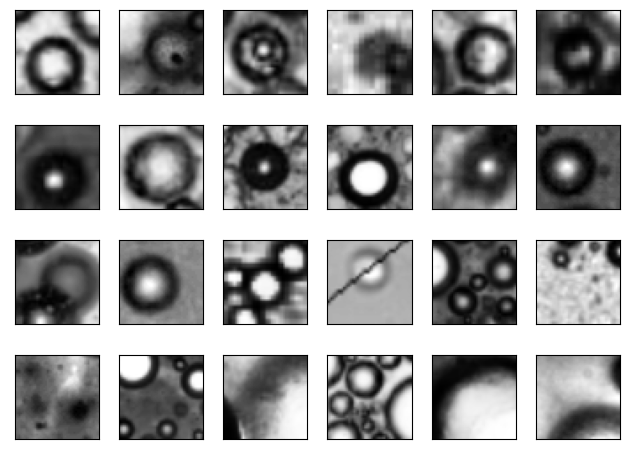

In [8]:
# графическое отражение некоторых изображений не сфер для обучения модели
fig, ax = plt.subplots(nrows=4, ncols=6, sharex= True, sharey = True)
ax=ax.flatten()
for i in range(24):
    img = cv2.resize(imagen[i*15000+500,:].reshape(32,32),dsize=(48,48))
    ax[i].imshow(img,cmap=plt.get_cmap('gray'))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
fig.savefig('fig2.jpg')
plt.show()

In [9]:
import pickle
#формирование и сохранение массива данных для последующего обучения моделей
imall=np.vstack((imagey,imagen[:kk+2400,:]))
yy=np.zeros(imall.shape[0])
yy[:(len(imagey))]=1

filename='data'
pickle.dump((imall,yy), open(filename, 'wb'))